<a href="https://colab.research.google.com/github/hiroyukiito/Arduino/blob/master/Getting_started_with_BigQuery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before you begin


1.   Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one.
2.   [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
3.   [Enable BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) APIs for the project.


### Provide your credentials to the runtime

In [0]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

## Optional: Enable data table display

Colab includes the ``google.colab.data_table`` package that can be used to display large pandas dataframes as an interactive data table.
It can be enabled with:

In [0]:
%load_ext google.colab.data_table

If you would prefer to return to the classic Pandas dataframe display, you can disable this by running:
```python
%unload_ext google.colab.data_table
```

# Use BigQuery via magics

The `google.cloud.bigquery` library also includes a magic command which runs a query and either displays the result or saves it to a variable as a `DataFrame`.

In [0]:
# Display query output immediately

%%bigquery --project yourprojectid
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.samples.gsod`

,total_rows
0,114420316


In [0]:
# Save output in a variable `df`

%%bigquery --project yourprojectid df
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.samples.gsod`

In [0]:
df

,total_rows
0,114420316


# Use BigQuery through google-cloud-bigquery

See [BigQuery documentation](https://cloud.google.com/bigquery/docs) and [library reference documentation](https://googlecloudplatform.github.io/google-cloud-python/latest/bigquery/usage.html).

The [GSOD sample table](https://bigquery.cloud.google.com/table/bigquery-public-data:samples.gsod) contains weather information collected by NOAA, such as precipitation amounts and wind speeds from late 1929 to early 2010.


### Declare the Cloud project ID which will be used throughout this notebook

In [0]:
project_id = '[your project ID]'

### Sample approximately 2000 random rows

In [0]:
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

sample_count = 2000
row_count = client.query('''
  SELECT 
    COUNT(*) as total
  FROM `bigquery-public-data.samples.gsod`''').to_dataframe().total[0]

df = client.query('''
  SELECT
    *
  FROM
    `bigquery-public-data.samples.gsod`
  WHERE RAND() < %d/%d
''' % (sample_count, row_count)).to_dataframe()

print('Full dataset has %d rows' % row_count)

Full dataset has 114420316 rows


### Describe the sampled data

In [0]:
df.describe()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,total_precipitation,snow_depth
count,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1883.000000,1883.000000,1460.000000,1460.000000,741.000000,741.000000,1776.000000,1776.000000,1950.000000,1950.000000,1922.000000,241.000000,1977.000000,1793.000000,91.000000
mean,505585.599293,89647.441132,1987.181405,6.525518,15.715513,52.391865,13.018696,42.018694,12.982475,1015.278630,11.506164,967.396491,11.979757,11.529279,12.737050,6.903385,12.969744,12.297659,24.829461,44.059231,0.065694,8.929670
std,302491.187318,27088.238467,15.993488,3.419259,8.661563,23.329842,7.886977,21.691902,7.914005,9.325395,7.516349,71.774000,7.783445,8.320365,7.843476,5.039771,7.860417,6.778960,8.776778,23.344521,0.283467,9.922707
min,10100.000000,13.000000,1933.000000,1.000000,1.000000,-91.400002,4.000000,-63.799999,4.000000,956.299988,4.000000,604.500000,4.000000,0.000000,4.000000,0.000000,4.000000,1.000000,8.000000,-96.900002,0.000000,0.400000
25%,238255.000000,99999.000000,1978.000000,4.000000,8.000000,39.299999,7.000000,30.349999,7.000000,1009.700012,6.000000,952.900024,6.000000,6.300000,7.000000,3.400000,7.000000,7.800000,19.400000,32.000000,0.000000,2.000000
50%,538980.000000,99999.000000,1990.000000,7.000000,16.000000,55.000000,8.000000,44.000000,8.000000,1014.850006,8.000000,995.599976,8.000000,9.300000,8.000000,5.800000,8.000000,11.100000,23.900000,46.400002,0.000000,5.900000
75%,725273.500000,99999.000000,2000.000000,10.000000,23.000000,69.800003,23.000000,56.700001,23.000000,1020.799988,21.000000,1010.299988,22.000000,13.825000,23.000000,9.100000,23.000000,15.900000,28.900000,60.799999,0.010000,11.600000
max,999999.000000,99999.000000,2010.000000,12.000000,31.000000,105.099998,24.000000,80.500000,24.000000,1052.900024,24.000000,1037.099976,24.000000,99.400002,24.000000,57.299999,24.000000,68.000000,66.000000,98.599998,5.910000,51.200001


### View the first 10 rows

In [0]:
df.head(10)

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,105780,99999,1968,9,13,46.000000,8,44.200001,8.0,NaN,NaN,NaN,NaN,4.700000,8.0,15.3,8.0,21.0,NaN,43.000000,False,None,None,0.02,NaN,True,True,True,True,True,True
1,25710,99999,1989,5,2,51.299999,23,44.900002,23.0,NaN,NaN,NaN,NaN,6.600000,23.0,7.5,23.0,12.0,NaN,42.799999,True,None,None,0.00,NaN,False,False,False,False,False,False
2,475160,99999,2003,4,26,45.200001,16,44.500000,16.0,NaN,NaN,NaN,NaN,4.500000,16.0,7.4,16.0,13.0,NaN,39.200001,True,None,None,NaN,NaN,False,False,False,False,False,False
3,476720,99999,1989,12,8,51.599998,4,34.000000,4.0,1005.400024,4.0,NaN,NaN,9.000000,4.0,5.0,4.0,8.0,NaN,41.900002,True,None,None,0.00,NaN,False,False,False,False,False,False
4,940040,99999,1991,6,9,84.300003,4,75.199997,4.0,1009.900024,4.0,1009.099976,4.0,24.900000,4.0,6.0,4.0,9.9,NaN,79.199997,True,None,None,0.00,NaN,False,False,False,False,False,False
5,103250,99999,1976,7,23,63.599998,13,48.599998,13.0,1022.099976,5.0,NaN,NaN,24.600000,13.0,3.0,12.0,6.0,NaN,48.200001,False,None,None,0.00,NaN,False,False,False,False,False,False
6,919280,99999,1981,2,21,83.800003,5,75.900002,5.0,1007.900024,5.0,NaN,NaN,17.100000,4.0,8.5,5.0,8.9,NaN,77.000000,False,None,None,0.00,NaN,False,False,False,False,False,False
7,961710,99999,2004,6,23,81.900002,6,74.900002,6.0,1010.500000,6.0,1008.000000,6.0,4.800000,6.0,1.5,6.0,5.1,NaN,74.800003,False,None,None,0.00,NaN,False,False,False,False,False,False
8,172400,99999,1990,6,6,65.400002,7,43.900002,7.0,1018.200012,7.0,906.099976,7.0,18.600000,7.0,2.0,7.0,4.1,NaN,45.000000,False,None,None,0.00,NaN,False,False,False,False,False,False
9,38790,99999,1973,4,7,44.799999,8,32.900002,8.0,1018.299988,8.0,NaN,NaN,17.200001,8.0,9.1,8.0,15.0,NaN,35.599998,True,None,None,NaN,NaN,False,False,False,False,False,False


In [0]:
# 10 highest total_precipitation samples
df.sort_values('total_precipitation', ascending=False).head(10)[['station_number', 'year', 'month', 'day', 'total_precipitation']]

,station_number,year,month,day,total_precipitation
644,230220,1964,7,15,5.91
1155,985430,2008,12,8,3.46
1196,248260,1961,11,1,2.95
1588,257670,1959,8,9,2.95
980,299150,1962,3,1,2.95
1325,470250,1965,11,25,2.95
1917,288380,1994,8,6,2.32
1211,585190,1995,4,14,2.32
250,647000,2005,8,19,2.20
1418,964710,1975,9,8,1.97


# Use BigQuery through pandas-gbq

The `pandas-gbq` library is a community led project by the pandas community. It covers basic functionality, such as writing a DataFrame to BigQuery and running a query, but as a third-party library it may not handle all BigQuery features or use cases.

[Pandas GBQ Documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_gbq.html)

In [0]:
import pandas as pd

sample_count = 2000
df = pd.io.gbq.read_gbq('''
  SELECT name, SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_2013`
  WHERE state = 'TX'
  GROUP BY name
  ORDER BY count DESC
  LIMIT 100
''', project_id=project_id, dialect='standard')

df.head()

In [0]:
from __future__ import print_function
import keras
from keras.applications import VGG16
from keras.models import Sequential, load_model, model_from_json
from keras import models, optimizers, layers
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split  
from PIL import Image 
from keras.preprocessing import image as images
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras import backend as K 
import os
import numpy as np  
import glob  
import pandas as pd
import cv2

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd ./gdrive/'My Drive'/"Colab Notebooks"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: './gdrive/My Drive/Colab Notebooks'
/content/gdrive/My Drive/Colab Notebooks


In [7]:
num_classes = 2
folder = ["Class1","Class1_def"]                                     
image_size = 224
x = []
y = []

for index, name in enumerate(folder):
    dir = "./DAGM/" + name
    files = glob.glob(dir + "/*.png")    
    for i, file in enumerate(files):    
        image = Image.open(file)                       
        image = image.convert("RGB")    
        image = image.resize((image_size, image_size))
        data = np.asarray(image)        
        x.append(data)  
        y.append(index) 

x = np.array(x)   
y = np.array(y)  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# ｙ　ラベルをワンホット表現に
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

236 train samples
59 test samples


In [8]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
last = vgg_conv.output

mod = Flatten()(last)
mod = Dense(1024, activation='relu')(mod)
mod = Dropout(0.5)(mod)
preds = Dense(2, activation='sigmoid')(mod)

model = models.Model(vgg_conv.input, preds)
model.summary()

epochs = 100
batch_size = 48

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Train on 236 samples, validate on 59 samples
Epoch 1/100
236/236 [==============================] - 5s 19ms/step - loss: 0.8115 - acc: 0.4915 - val_loss: 0.6849 - val_acc: 0.6102
Epoch 2/100
236/236 [==============================] - 3s 15ms/step - loss: 0.7440 - acc: 0.5021 - val_loss: 0.7250 - val_acc: 0.5339
Epoch 3/100
236/236 [==============================] - 3s 15ms/step - loss: 0.7624 - acc: 0.5360 - val_loss: 0.6997 - val_acc: 0.4831
Epoch 4/100
236/236 [==============================] - 3s 15ms/step - loss: 0.7468 - acc: 0.4894 - val_loss: 0.6897 - val_acc: 0.5169
Epoch 5/100
236/236 [==============================] - 3s 15ms/step - loss: 0.7556 - acc: 0.4979 - val_loss: 0.6878 - val_acc: 0.5254
Epoch 6/100
236/236 [==============================] - 3s 15ms/step - loss: 0.7287 - acc: 0.5360 - val_loss: 0.7068 - val_acc: 0.4661
Epoch 7/100
236/236 [==============================] - 3s 15ms/step - loss: 0.7334 - acc: 0.4936 - val_loss: 0.6966 - val_acc: 0.4831
Epoch 8/100
236/2

59/59 [==============================] - 5s 89ms/step
Test loss: 0.023200192883358162
Test accuracy: 1.0


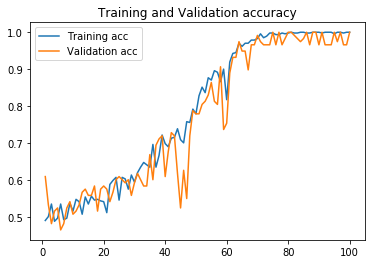

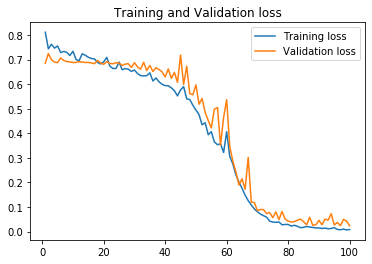

In [10]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

### Plot accuracy & loss
import matplotlib.pyplot as plt 

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

#plot accuracy
plt.plot(epochs, acc, label = "Training acc" )
plt.plot(epochs, val_acc, label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

#plot loss
plt.plot(epochs, loss,  label = "Training loss" )
plt.plot(epochs, val_loss, label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [0]:
model.save_weights('grad_vgg16_weight_DAGM_C1.h5')


In [0]:
K.set_learning_phase(1) #set learning phase

def Grad_Cam(input_model, pic_array, layer_name):

    # 前処理
    pic = np.expand_dims(pic_array, axis=0)
    pic = pic.astype('float32')
    preprocessed_input = pic / 255.0

    # 予測クラスの算出
    predictions = input_model.predict(preprocessed_input)
    class_idx = np.argmax(predictions[0])
    class_output = input_model.output[:, class_idx]

    #  勾配を取得
    conv_output = input_model.get_layer(layer_name).output   # layer_nameのレイヤーのアウトプット
    grads = K.gradients(class_output, conv_output)[0]  # gradients(loss, variables) で、variablesのlossに関しての勾配を返す
    gradient_function = K.function([input_model.input], [conv_output, grads])  # input_model.inputを入力すると、conv_outputとgradsを出力する関数

    output, grads_val = gradient_function([preprocessed_input])
    output, grads_val = output[0], grads_val[0]

    # 重みを平均化して、レイヤーのアウトプットに乗じる
    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)

    # 画像化してヒートマップにして合成
    cam = cv2.resize(cam, (224, 224), cv2.INTER_LINEAR) 
    cam = np.maximum(cam, 0) 
    cam = cam / cam.max()

    jetcam = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)  # モノクロ画像に疑似的に色をつける
    jetcam = cv2.cvtColor(jetcam, cv2.COLOR_BGR2RGB)  # 色をRGBに変換
    jetcam = (np.float32(jetcam) + pic / 2)   # もとの画像に合成
    return jetcam

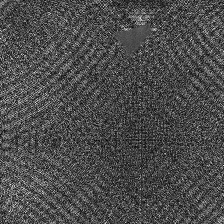

In [13]:
pic_array = img_to_array(load_img('DAGM/Class1_def/12.png', target_size=(224, 224)))
pic = pic_array.reshape((1,) + pic_array.shape)
array_to_img(pic_array)

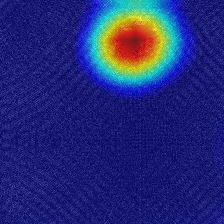

In [14]:
picture = Grad_Cam(model, pic_array, 'block5_conv3')
picture = picture[0,:,:,]
array_to_img(picture)

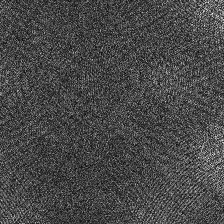

In [15]:
pic_array = img_to_array(load_img('DAGM/Class1/12.png', target_size=(224, 224)))
pic = pic_array.reshape((1,) + pic_array.shape)
array_to_img(pic_array)

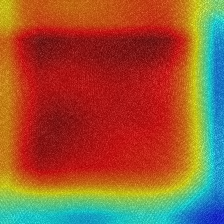

In [16]:
picture = Grad_Cam(model, pic_array, 'block5_conv3')
picture = picture[0,:,:,]
array_to_img(picture)

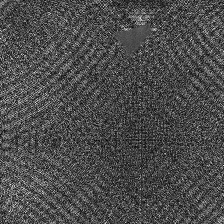

In [17]:
pic_array = img_to_array(load_img('DAGM/Class1_def/12.png', target_size=(224, 224)))
pic = pic_array.reshape((1,) + pic_array.shape)
array_to_img(pic_array)

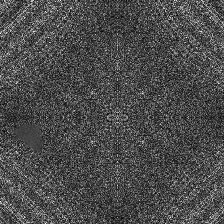

In [18]:
pic_array = img_to_array(load_img('DAGM/Class1_def/53.png', target_size=(224, 224)))
pic = pic_array.reshape((1,) + pic_array.shape)
array_to_img(pic_array)

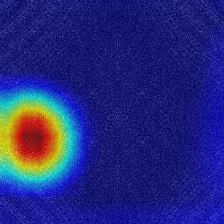

In [19]:
picture = Grad_Cam(model, pic_array, 'block5_conv3')
picture = picture[0,:,:,]
array_to_img(picture)

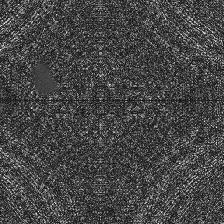

In [20]:
pic_array = img_to_array(load_img('DAGM/Class1_def/121.png', target_size=(224, 224)))
pic = pic_array.reshape((1,) + pic_array.shape)
array_to_img(pic_array)

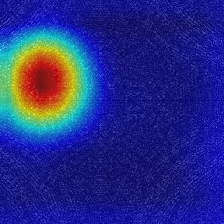

In [21]:
picture = Grad_Cam(model, pic_array, 'block5_conv3')
picture = picture[0,:,:,]
array_to_img(picture)